# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Before preprocessing data, a function to fetch real-time stock data (using Alpha Vantage API) is made

In [13]:
# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient()
# key = user_secrets.get_secret("api")

# import requests
# import csv
# from tqdm import tqdm

def request_stock_price_list(symbol):
    df = pd.read_csv(F"./stock_market_data/sp500/csv/{symbol}.csv")
    df.drop('Adjusted Close', axis=1, inplace=True)

    return df


In [14]:
# UNCOMMENT THE CELL IF DATA IS NEEDED TO BE LOADED FOR 1ST TIME

cv1 = request_stock_price_list('MSFT')
cv1.head()

,Date,Low,Open,Volume,High,Close
0,13-03-1986,0.088542,0.088542,1031788800,0.101563,0.097222
1,14-03-1986,0.097222,0.097222,308160000,0.102431,0.100694
2,17-03-1986,0.100694,0.100694,133171200,0.103299,0.102431
3,18-03-1986,0.098958,0.102431,67766400,0.103299,0.099826
4,19-03-1986,0.097222,0.099826,47894400,0.100694,0.098090


Then the datasets are loaded

In [15]:
# For data preprocessing and analysis part
data = request_stock_price_list('MSFT')
data.head()

,Date,Low,Open,Volume,High,Close
0,13-03-1986,0.088542,0.088542,1031788800,0.101563,0.097222
1,14-03-1986,0.097222,0.097222,308160000,0.102431,0.100694
2,17-03-1986,0.100694,0.100694,133171200,0.103299,0.102431
3,18-03-1986,0.098958,0.102431,67766400,0.103299,0.099826
4,19-03-1986,0.097222,0.099826,47894400,0.100694,0.098090


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9039 non-null   object 
 1   Low     9039 non-null   float64
 2   Open    9039 non-null   float64
 3   Volume  9039 non-null   int64  
 4   High    9039 non-null   float64
 5   Close   9039 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 423.8+ KB


In [17]:
data.describe()

,Low,Open,Volume,High,Close
count,9039.000000,9039.000000,9.039000e+03,9039.000000,9039.000000
mean,39.660308,40.085043,5.884358e+07,40.504030,40.096104
std,56.575881,57.125083,3.850921e+07,57.654011,57.145270
min,0.088542,0.088542,2.304000e+06,0.092014,0.090278
25%,3.947754,3.976563,3.470400e+07,4.027344,3.984375
50%,26.490000,26.780001,5.211580e+07,27.070000,26.780001
75%,38.985001,39.551250,7.275455e+07,39.995001,39.545000
max,342.200012,344.619995,1.031789e+09,349.670013,343.109985


In [18]:
data.isnull().sum()

Date      0
Low       0
Open      0
Volume    0
High      0
Close     0
dtype: int64

Filling null columns with mean values....

In [19]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_50755/2985681012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Low,Open,Volume,High,Close
0,13-03-1986,0.088542,0.088542,1031788800,0.101563,0.097222
1,14-03-1986,0.097222,0.097222,308160000,0.102431,0.100694
2,17-03-1986,0.100694,0.100694,133171200,0.103299,0.102431
3,18-03-1986,0.098958,0.102431,67766400,0.103299,0.099826
4,19-03-1986,0.097222,0.099826,47894400,0.100694,0.098090


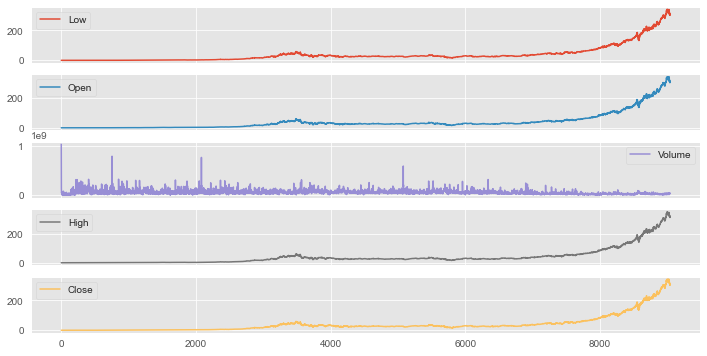

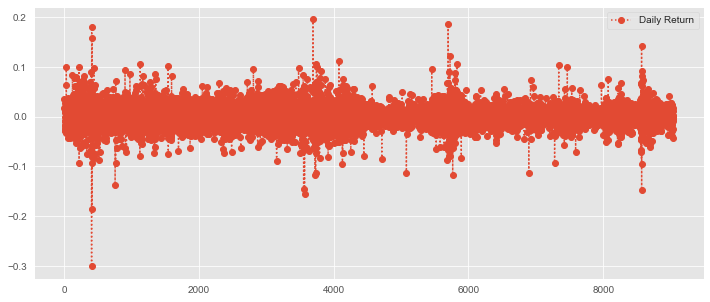

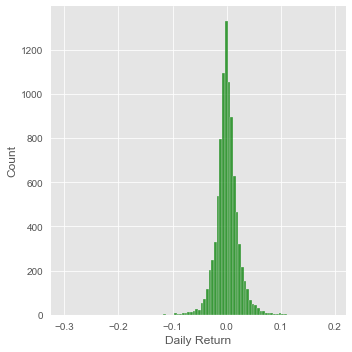

/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_50755/2438974047.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


            Date         Low        Open      Volume        High       Close  \
0     13-03-1986    0.088542    0.088542  1031788800    0.101563    0.097222   
1     14-03-1986    0.097222    0.097222   308160000    0.102431    0.100694   
2     17-03-1986    0.100694    0.100694   133171200    0.103299    0.102431   
3     18-03-1986    0.098958    0.102431    67766400    0.103299    0.099826   
4     19-03-1986    0.097222    0.099826    47894400    0.100694    0.098090   
...          ...         ...         ...         ...         ...         ...   
9034  13-01-2022  304.000000  320.470001    45366000  320.880005  304.799988   
9035  14-01-2022  303.750000  304.250000    39823500  310.820007  310.200012   
9036  18-01-2022  301.739990  304.070007    42333200  309.799988  302.649994   
9037  19-01-2022  302.700012  306.290009    45933900  313.910004  303.329987   
9038  20-01-2022  301.140015  309.070007    35255200  311.649994  301.600006   

      MA for 10 days  MA for 50 days  M

Date               0
Low                0
Open               0
Volume             0
High               0
Close              0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

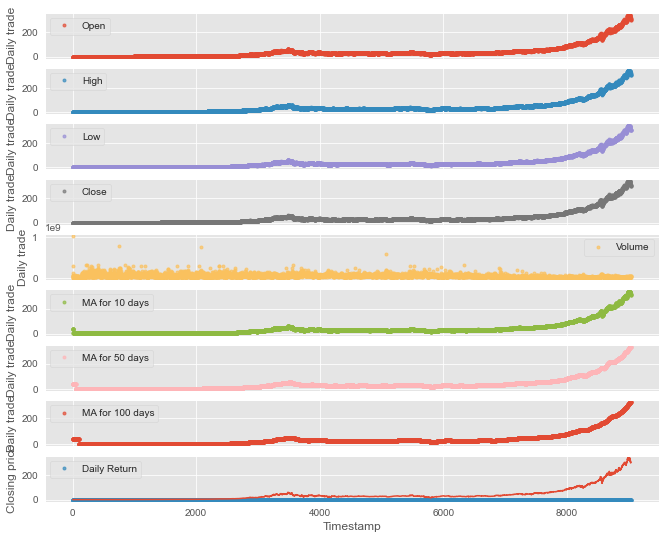

In [20]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

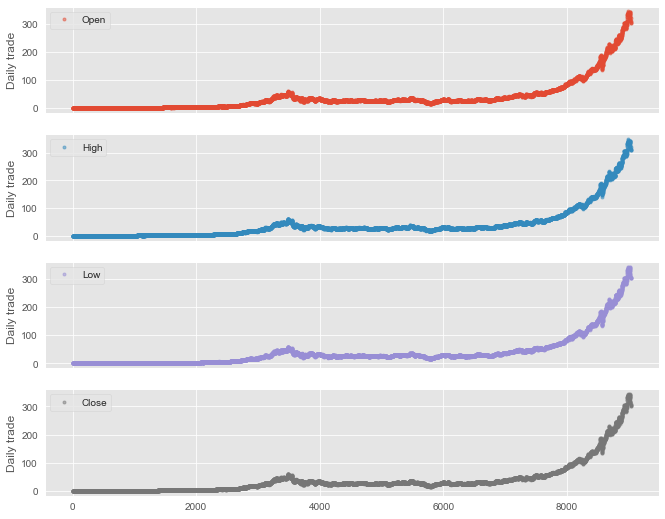

In [21]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

            Date         Low        Open      Volume        High       Close  \
0     13-03-1986    0.088542    0.088542  1031788800    0.101563    0.097222   
1     14-03-1986    0.097222    0.097222   308160000    0.102431    0.100694   
2     17-03-1986    0.100694    0.100694   133171200    0.103299    0.102431   
3     18-03-1986    0.098958    0.102431    67766400    0.103299    0.099826   
4     19-03-1986    0.097222    0.099826    47894400    0.100694    0.098090   
...          ...         ...         ...         ...         ...         ...   
9034  13-01-2022  304.000000  320.470001    45366000  320.880005  304.799988   
9035  14-01-2022  303.750000  304.250000    39823500  310.820007  310.200012   
9036  18-01-2022  301.739990  304.070007    42333200  309.799988  302.649994   
9037  19-01-2022  302.700012  306.290009    45933900  313.910004  303.329987   
9038  20-01-2022  301.140015  309.070007    35255200  311.649994  301.600006   

      MA for 10 days  MA for 50 days  M

,count,mean,std,min,25%,50%,75%,max
Low,9039.0,3.966031e+01,5.657588e+01,8.854200e-02,3.947754e+00,2.649000e+01,3.898500e+01,3.422000e+02
Open,9039.0,4.008504e+01,5.712508e+01,8.854200e-02,3.976563e+00,2.678000e+01,3.955125e+01,3.446200e+02
Volume,9039.0,5.884358e+07,3.850921e+07,2.304000e+06,3.470400e+07,5.211580e+07,7.275455e+07,1.031789e+09
High,9039.0,4.050403e+01,5.765401e+01,9.201400e-02,4.027344e+00,2.707000e+01,3.999500e+01,3.496700e+02
Close,9039.0,4.009610e+01,5.714527e+01,9.027800e-02,3.984375e+00,2.678000e+01,3.954500e+01,3.431100e+02
MA for 10 days,9039.0,3.998313e+01,5.681029e+01,9.435760e-02,3.973145e+00,2.680100e+01,3.961250e+01,3.383650e+02
MA for 50 days,9039.0,3.943038e+01,5.507028e+01,1.012327e-01,4.392617e+00,2.680130e+01,3.943038e+01,3.329644e+02
MA for 100 days,9039.0,3.875048e+01,5.290535e+01,1.047266e-01,4.896074e+00,2.679640e+01,3.875048e+01,3.166744e+02
Daily Return,9039.0,1.118272e-03,2.132737e-02,-3.011589e-01,-9.181736e-03,3.402596e-04,1.121039e-02,1.956522e-01


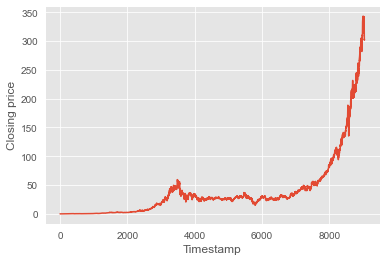

In [22]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [24]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

7149
1788


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [25]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

2022-02-08 22:07:26.577049: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/40
179/179 [==============================] - 11s 24ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0792 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0645
Epoch 2/40
179/179 [==============================] - 3s 17ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0590 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0539
Epoch 3/40
179/179 [==============================] - 3s 16ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0558 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0472
Epoch 4/40
179/179 [==============================] - 3s 16ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0533 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0457
Epoch 5/40
179/179 [==============================] - 3s 16ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0526 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0519
Epoch 6/40
179/179 [==============================] - 3s 18ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0517 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0483
Epoch 7/4

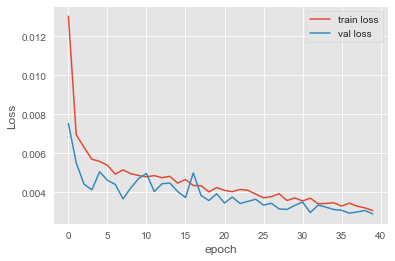

In [26]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

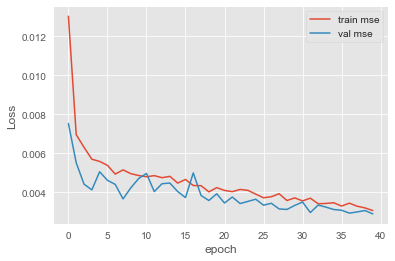

In [27]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

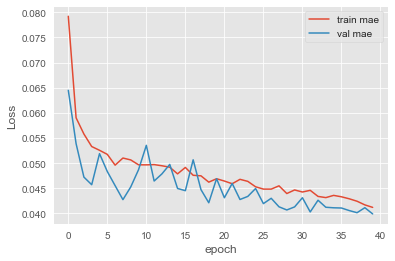

In [28]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [29]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [30]:
model.evaluate(test_X, test_Y)

56/56 [==============================] - 0s 6ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0399


[0.002894624834880233, 0.002894624834880233, 0.03990957513451576]

In [31]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.947025
R2 Score: 0.947025
Max Error: 0.294101


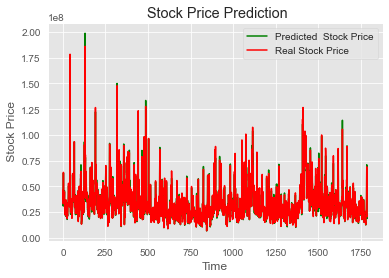

In [32]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction

In [33]:
# First we need to save a model
model.save("MSFT_model.h5")

In [35]:
# Load model
new_model = tf.keras.models.load_model("./MSFT_model.h5")

In [36]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [ ]:
# For data preprocessing and analysis part
#data2 = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/aaoi.us.txt')
#data2 = pd.read_csv('../input/nifty50-stock-market-data/SBIN.csv')
#data2 = pd.read_csv('../input/stock-market-data/stock_market_data/nasdaq/csv/ACTG.csv')
data2 = pd.read_csv('./data.csv')
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

      Unnamed: 0    open      high     low   close    volume
0              0  130.63  131.6500  129.95  131.62   4294499
1              1  130.00  130.9600  129.52  130.63   3649044
2              2  129.06  129.7900  127.60  129.75   3923198
3              3  127.66  129.3356  127.66  128.97   4855972
4              4  125.72  127.2000  124.70  127.06   4941411
...          ...     ...       ...     ...     ...       ...
5570        5570   92.75   92.9400   90.19   90.25  13737600
5571        5571   94.44   94.4400   90.00   91.56  16697600
5572        5572   95.87   95.9400   93.50   94.37  10369100
5573        5573   96.75   96.8100   93.69   94.81  11105400
5574        5574   98.50   98.8100   96.37   96.75   9551800

[5575 rows x 6 columns]
4378
1095


In [ ]:
model.evaluate(test_X, test_Y)

35/35 [==============================] - 0s 4ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0605


[0.006102326791733503, 0.006102326791733503, 0.060518551617860794]

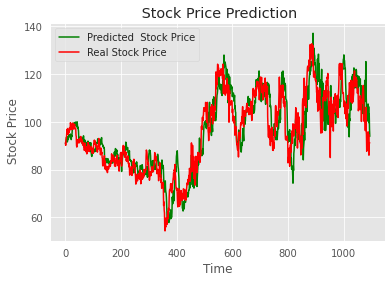

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
# Converting model from HDF5 format to TFJS format...
!pip install tensorflowjs[wizard]
# Need to be done on a CLI and not in notebook
!tensorflowjs_converter --input_format=keras /kaggle/working/model.h5 /kaggle/working/model-tjs

2021-12-28 04:28:46.375653: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# EDA

This section is exploratory data analysis on the dataset collected. This is just for analysing the data...

In [ ]:
dataX = pd.read_csv('./data.csv')
dataY = pd.read_csv('./data.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5575 non-null   int64  
 1   open        5575 non-null   float64
 2   high        5575 non-null   float64
 3   low         5575 non-null   float64
 4   close       5575 non-null   float64
 5   volume      5575 non-null   int64  
 6   date        5575 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 305.0+ KB


In [ ]:
dataX.head()

,Unnamed: 0,open,high,low,close,volume,date
0,0,130.63,131.6500,129.95,131.62,4294499,2021-12-27
1,1,130.00,130.9600,129.52,130.63,3649044,2021-12-23
2,2,129.06,129.7900,127.60,129.75,3923198,2021-12-22
3,3,127.66,129.3356,127.66,128.97,4855972,2021-12-21
4,4,125.72,127.2000,124.70,127.06,4941411,2021-12-20


In [ ]:
start_date = '2020-01-01'
end_date = '2021-11-29'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['date']>=start_date) & (dataX['date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Unnamed: 0,open,high,low,close,volume,date
19,19,118.62,119.610,117.53,118.50,8949795,2021-11-29
20,20,115.00,116.335,114.56,115.81,3322012,2021-11-26
21,21,116.16,117.270,116.08,116.73,3220802,2021-11-24
22,22,116.79,117.940,116.04,116.79,4914995,2021-11-23
23,23,116.00,118.810,115.19,116.47,6417218,2021-11-22
...,...,...,...,...,...,...,...
496,496,134.51,135.860,133.92,135.31,4345952,2020-01-08
497,497,133.69,134.960,133.40,134.19,3267592,2020-01-07
498,498,133.42,134.240,133.20,134.10,2421128,2020-01-06
499,499,133.57,134.860,133.56,134.34,2373470,2020-01-03


In [ ]:
fill2 = (dataY['date']>=start) & (dataY['date']<=end)
dataY = dataY.loc[fill2]
dataY

,Unnamed: 0,open,high,low,close,volume,date
501,501,132.53,134.12,132.40,134.04,3777504,2019-12-31
502,502,135.20,135.30,132.50,132.81,4118929,2019-12-30
503,503,135.00,135.75,134.87,135.27,2752185,2019-12-27
504,504,134.98,135.31,134.65,134.91,2129654,2019-12-26
505,505,135.61,135.62,134.61,134.98,1202087,2019-12-24
...,...,...,...,...,...,...,...
999,999,162.66,163.91,161.70,163.47,5101023,2018-01-08
1000,1000,162.44,162.90,161.10,162.49,5162075,2018-01-05
1001,1001,159.65,162.32,159.37,161.70,7363843,2018-01-04
1002,1002,157.34,159.81,156.33,158.49,9439063,2018-01-03


In [ ]:
dataX.describe()

,Unnamed: 0,open,high,low,close,volume
count,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02
mean,259.500000,129.382080,130.691720,128.092867,129.364751,5.454950e+06
std,139.285678,11.382857,11.114856,11.592091,11.353678,3.339331e+06
min,19.000000,94.600000,97.740000,90.560000,94.770000,1.761122e+06
25%,139.250000,121.250000,122.623500,120.102500,121.105000,3.644222e+06
50%,259.500000,126.325000,127.320000,125.045000,126.160000,4.655173e+06
75%,379.750000,139.672500,140.467500,138.757500,139.572500,6.115408e+06
max,500.000000,156.820000,158.750000,155.420000,156.760000,3.806353e+07


In [ ]:
dataY.describe()

,Unnamed: 0,open,high,low,close,volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,752.000000,140.470239,141.512740,139.348929,140.416143,4.590926e+06
std,145.347859,11.156349,11.144803,11.149435,11.121441,2.880224e+06
min,501.000000,108.000000,111.000000,105.940000,107.570000,1.202087e+06
25%,626.500000,134.485000,135.305000,133.570000,134.360000,3.067226e+06
50%,752.000000,140.720000,141.780000,139.790000,140.850000,3.783614e+06
75%,877.500000,146.635000,147.300000,145.540000,146.385000,5.033500e+06
max,1003.000000,170.000000,171.130000,168.150000,169.120000,2.206367e+07


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


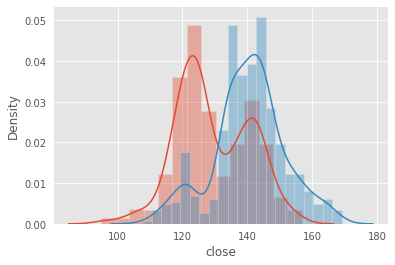

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

sns_plot = sns.distplot(dataX['close'])
sns_plot2 = sns.distplot(dataY['close'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

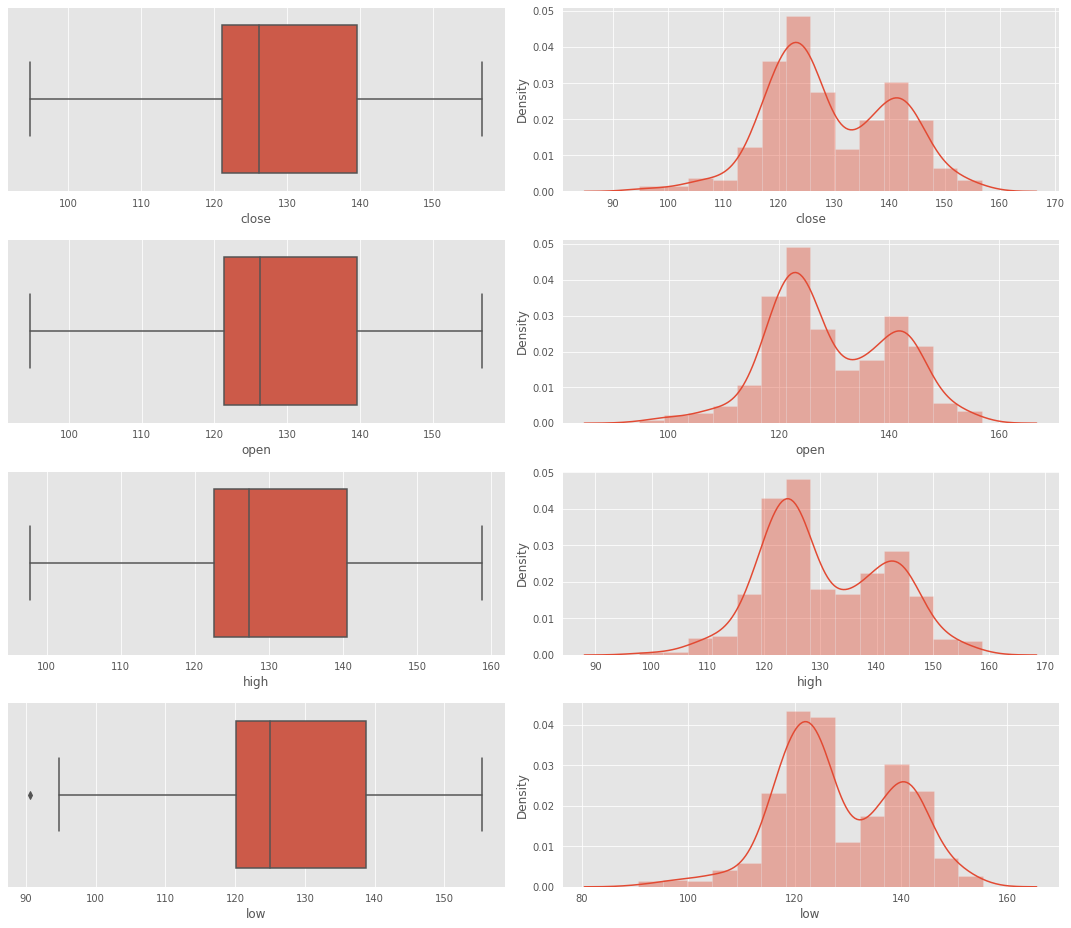

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["close"], ax = ax[0,0])
sns.distplot(dataX['close'], ax = ax[0,1])
sns.boxplot(x= dataX["open"], ax = ax[1,0])
sns.distplot(dataX['open'], ax = ax[1,1])
sns.boxplot(x= dataX["high"], ax = ax[2,0])
sns.distplot(dataX['high'], ax = ax[2,1])
sns.boxplot(x= dataX["low"], ax = ax[3,0])
sns.distplot(dataX['low'], ax = ax[3,1])
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

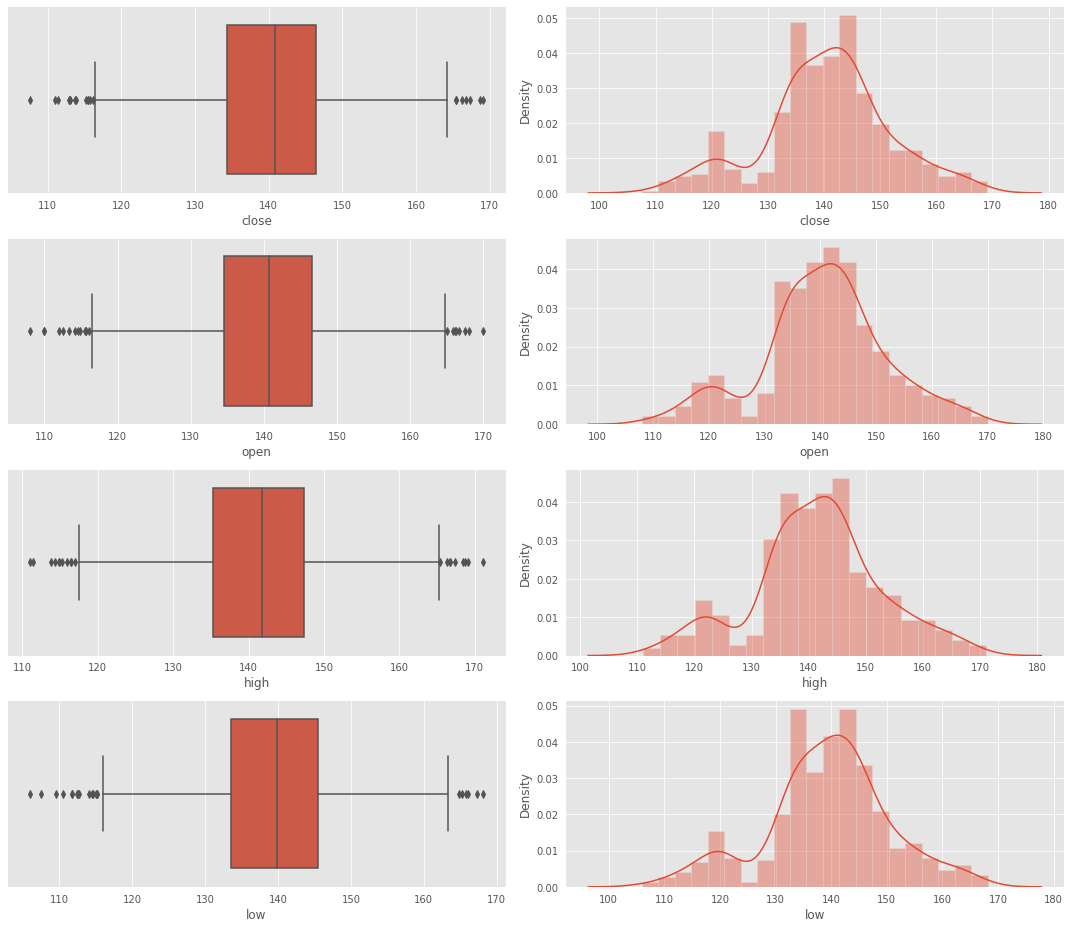

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataY["close"], ax = ax[0,0])
sns.distplot(dataY['close'], ax = ax[0,1])
sns.boxplot(x= dataY["open"], ax = ax[1,0])
sns.distplot(dataY['open'], ax = ax[1,1])
sns.boxplot(x= dataY["high"], ax = ax[2,0])
sns.distplot(dataY['high'], ax = ax[2,1])
sns.boxplot(x= dataY["low"], ax = ax[3,0])
sns.distplot(dataY['low'], ax = ax[3,1])
plt.tight_layout()

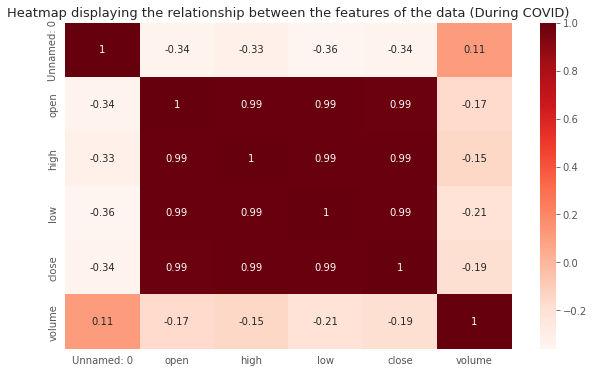

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
         fontsize=13)
plt.show()

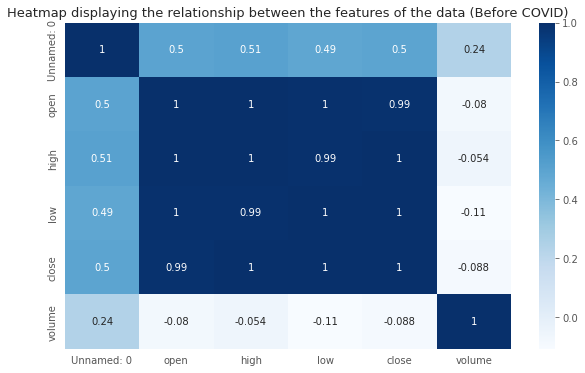

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataY.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (Before COVID)',
         fontsize=13)
plt.show()

In [ ]:
# For other company....

# UNCOMMENT IF NEEDED...
#cv2 = request_stock_price_list('RELIANCE.BSE', 'full', key)
#print(cv2.head)
#cv2.to_csv('data2.csv')

dataX = pd.read_csv('./data2.csv')
dataY = pd.read_csv('./data2.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4184 non-null   int64  
 1   open        4184 non-null   float64
 2   high        4184 non-null   float64
 3   low         4184 non-null   float64
 4   close       4184 non-null   float64
 5   volume      4184 non-null   int64  
 6   date        4184 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 228.9+ KB


In [ ]:
start_date = '2020-01-01'
end_date = '2021-11-29'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['date']>=start_date) & (dataX['date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Unnamed: 0,open,high,low,close,volume,date
20,20,2412.0000,2500.0000,2400.0000,2442.5000,451870,2021-11-29
21,21,2470.0000,2477.4500,2403.0000,2412.1499,397321,2021-11-26
22,22,2375.5000,2502.8000,2358.0000,2494.3999,476931,2021-11-25
23,23,2381.3999,2410.8501,2344.0000,2350.8999,1856369,2021-11-24
24,24,2339.0000,2401.5000,2309.3999,2386.1499,457139,2021-11-23
...,...,...,...,...,...,...,...
489,489,1519.9995,1533.9995,1514.4495,1525.0495,509038,2020-01-07
490,490,1526.9995,1527.9995,1497.4995,1501.4995,457443,2020-01-06
491,491,1534.3995,1541.2995,1523.3995,1537.2495,357456,2020-01-03
492,492,1513.9995,1540.7995,1512.9995,1535.3495,733200,2020-01-02


In [ ]:
fill2 = (dataY['date']>=start) & (dataY['date']<=end)
dataY = dataY.loc[fill2]
dataY

,Unnamed: 0,open,high,low,close,volume,date
493,493,1516.0995,1527.3995,1505.3495,1509.6995,461171,2020-01-01
494,494,1544.6995,1544.6995,1509.0995,1514.0995,298520,2019-12-31
495,495,1542.9995,1546.9995,1528.2995,1544.1995,374974,2019-12-30
496,496,1524.9995,1545.7995,1521.4495,1542.1495,490080,2019-12-27
497,497,1545.9495,1553.2995,1510.9495,1515.9495,582675,2019-12-26
...,...,...,...,...,...,...,...
978,978,920.4997,925.8497,919.4497,922.9997,410556,2018-01-05
979,979,918.9997,921.7997,915.9997,920.2497,241196,2018-01-04
980,980,924.4497,927.1997,913.2997,916.3497,520663,2018-01-03
981,981,914.9997,919.1997,907.2497,911.3997,1779802,2018-01-02


In [ ]:
dataX.describe()

,Unnamed: 0,open,high,low,close,volume
count,474.000000,474.000000,474.000000,474.000000,474.000000,4.740000e+02
mean,256.500000,1953.239692,1977.124080,1925.387901,1949.614691,1.148593e+06
std,136.976275,378.827940,377.669256,377.601744,377.490721,6.773073e+06
min,20.000000,919.999700,951.999700,875.699700,883.849700,6.484700e+04
25%,138.250000,1731.837500,1754.662500,1714.137500,1729.987500,2.998212e+05
50%,256.500000,2013.850000,2045.550000,1990.925000,2007.300000,4.758745e+05
75%,374.750000,2170.825000,2194.675000,2139.500000,2167.175000,9.260610e+05
max,493.000000,2740.000000,2750.000000,2708.000000,2731.500000,1.187279e+08


In [ ]:
dataY.describe()

,Unnamed: 0,open,high,low,close,volume
count,490.00000,490.000000,490.000000,490.000000,490.000000,4.900000e+02
mean,737.50000,1182.485761,1194.496168,1168.685966,1181.144638,5.672558e+05
std,141.59508,185.207018,186.587684,182.842687,184.419946,5.363404e+05
min,493.00000,879.999700,895.999700,872.099700,882.799700,1.488160e+05
25%,615.25000,999.624700,1012.524700,990.762200,1002.462200,3.096382e+05
50%,737.50000,1207.499600,1223.449600,1195.999600,1210.324600,4.345385e+05
75%,859.75000,1297.999600,1314.699600,1283.862100,1296.824600,6.224218e+05
max,982.00000,1611.199500,1617.799500,1595.649500,1605.149500,6.718394e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


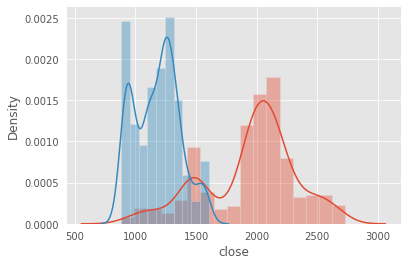

In [ ]:
sns_plot = sns.distplot(dataX['close'])
sns_plot2 = sns.distplot(dataY['close'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

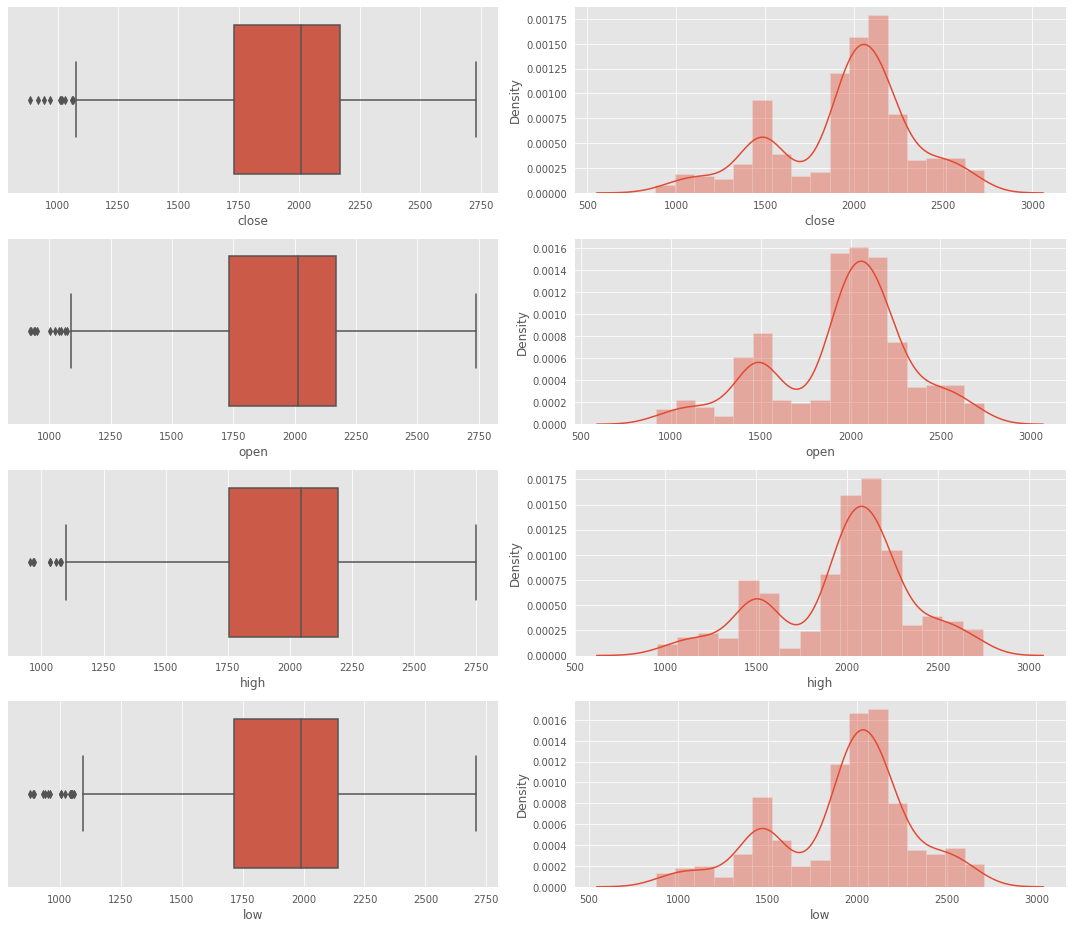

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["close"], ax = ax[0,0])
sns.distplot(dataX['close'], ax = ax[0,1])
sns.boxplot(x= dataX["open"], ax = ax[1,0])
sns.distplot(dataX['open'], ax = ax[1,1])
sns.boxplot(x= dataX["high"], ax = ax[2,0])
sns.distplot(dataX['high'], ax = ax[2,1])
sns.boxplot(x= dataX["low"], ax = ax[3,0])
sns.distplot(dataX['low'], ax = ax[3,1])
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

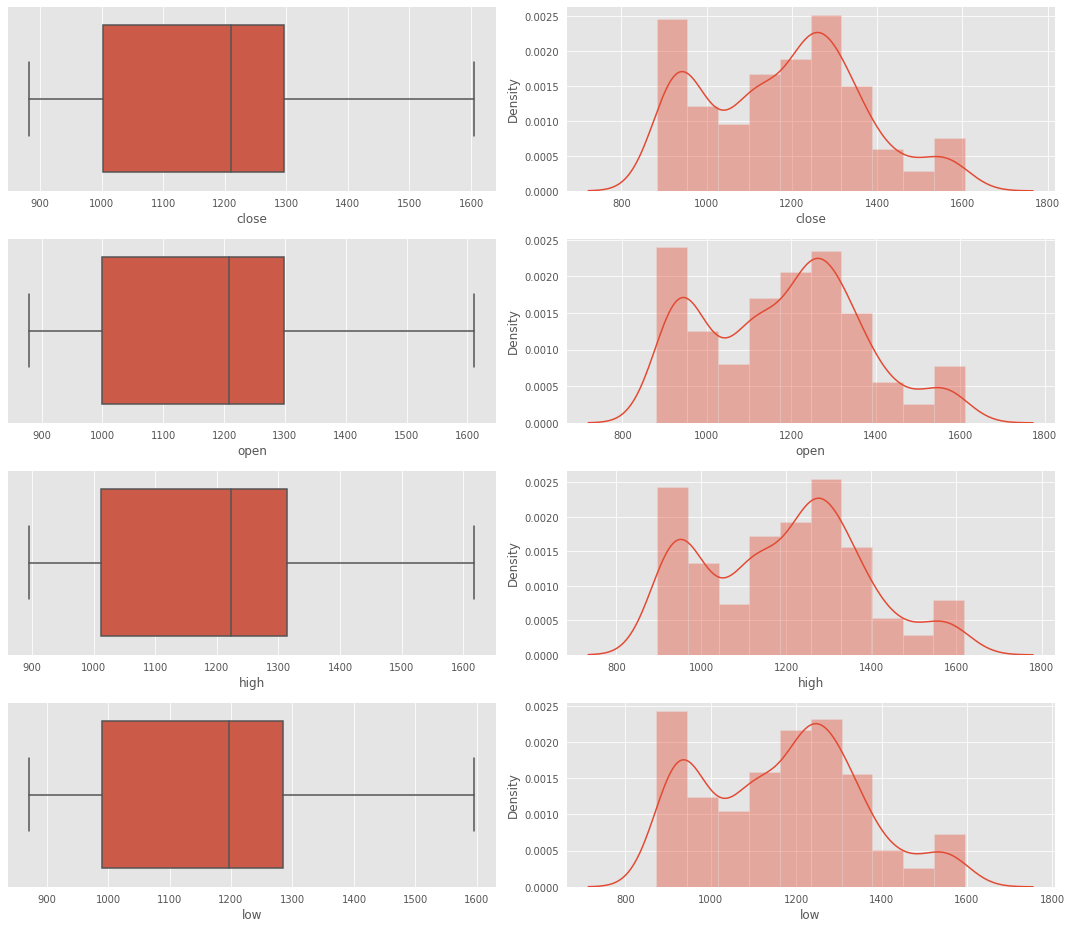

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataY["close"], ax = ax[0,0])
sns.distplot(dataY['close'], ax = ax[0,1])
sns.boxplot(x= dataY["open"], ax = ax[1,0])
sns.distplot(dataY['open'], ax = ax[1,1])
sns.boxplot(x= dataY["high"], ax = ax[2,0])
sns.distplot(dataY['high'], ax = ax[2,1])
sns.boxplot(x= dataY["low"], ax = ax[3,0])
sns.distplot(dataY['low'], ax = ax[3,1])
plt.tight_layout()

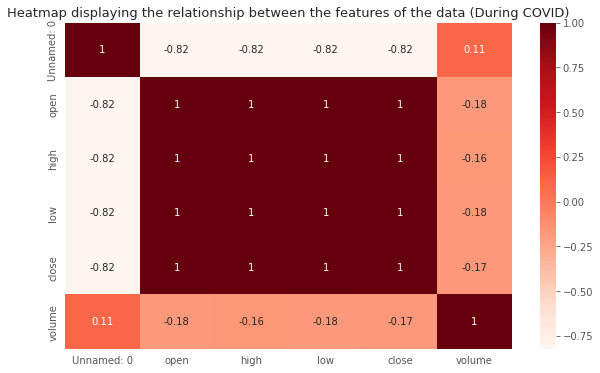

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
         fontsize=13)
plt.show()

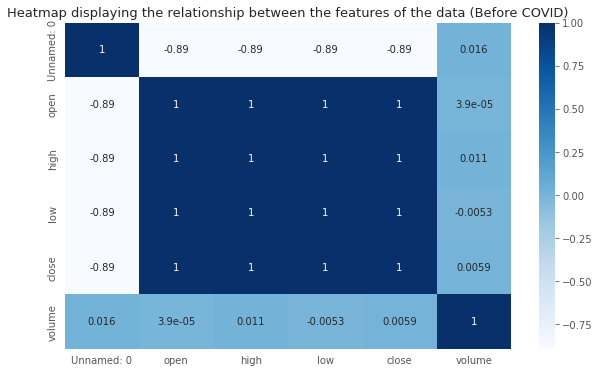

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataY.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (Before COVID)',
         fontsize=13)
plt.show()